# Demo for Lecture 7
- Decision Trees
- Logistic Regression
- Bootstrapping

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets

The decision tree algorithm can be used to do both classification as well as regression and has the advantage of not assuming a linear model. Decisions trees are usually easy to represent visually which makes it easy to understand how the model actually works.

In [ ]:
df = pd.read_csv('lectureexample.csv')
X=df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
Y=df['diagnosis']
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Decision Tree with Ordinary Train Test Split

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1998)

In [6]:
# Creates the Decision Tree Classifier
model=tree.DecisionTreeClassifier(max_depth=5)

#TODO: train the model
model.fit(X_train, Y_train)

#TODO: Calculate the training and testing accuracy
dtree_predict_train = model.predict(X_train)
dtree_predict_test = model.predict(X_test)

print("Train Accuracy: ", accuracy_score(Y_train, dtree_predict_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_predict_test) )


Train Accuracy:  0.994750656167979
Test Accuracy:  0.9095744680851063


# Decision Tree with K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import LeavePOut

p = 2

incX = X
incY = Y

# create KFold 
lpo = LeavePOut(p=p)

scorelist = []

for train_index, test_index in lpo.split(incX):
  X_train = incX.iloc[train_index]
  Y_train = incY.iloc[train_index]
  X_test = incX.iloc[test_index]
  Y_test = incY.iloc[test_index]

  model.fit(X_train, Y_train)
  dtree_pred_test = model.predict(X_test)
  print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))
  scorelist.append(accuracy_score(Y_test, dtree_pred_test))

print("Decision Tree Model performance using lpo CV: " + str(np.mean(scorelist)))


Test Accuracy:  0.8771929824561403
Test Accuracy:  0.9210526315789473
Test Accuracy:  0.9473684210526315
Test Accuracy:  0.9385964912280702
Test Accuracy:  0.9026548672566371
Decision Tree Model performance using k-fold CV: 0.9173730787144854


## Bootstrapping Example

--------------------------------------

In [12]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

We'll be using this dataset: https://www.kaggle.com/akram24/social-network-ads
Download the dataset

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


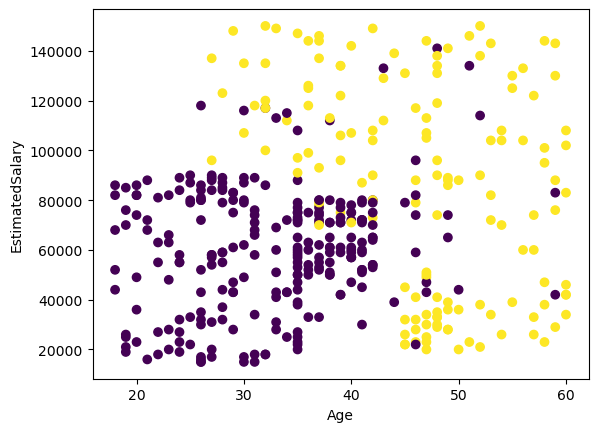

In [5]:
plt.scatter(df.iloc[:,2], df.iloc[:,3],c=df.iloc[:,-1])
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

In [13]:
X = df.iloc[:, 1:4]
for index, row in X.iterrows():
    if row['Gender'] == 'Male':
        X.loc[index, 'Gender'] = 0
    else:
        X.loc[index, 'Gender'] = 1

# predict whether or not a user purchased
y = df.iloc[:, 4]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1998)
df_train = pd.concat([X_train, y_train], axis=1)

predictions = []
accuracies = []
m = 100
for i in range(m):
    df_bootstrap = df_train.sample(frac=1,replace=True, random_state = 42 + i)
    X_b = df_bootstrap.iloc[:,  :3]
    y_b = df_bootstrap.iloc[:, 3]
    classifier = SVC(kernel='rbf', gamma=1)
    classifier.fit(X_b, y_b)
    p = classifier.predict(X_train)
    # counts the number of times y_train = 1 and p >= 0.5
    accuracies.append(np.sum(y_train == (p >= 0.5)) / len(df))
    predictions.append(p)

In [14]:
np.mean(accuracies)

0.7847750000000002

In [15]:
total_predictions = predictions[0]

for i in range(1,m):
    total_predictions = total_predictions + predictions[i]

bootstrap_preds = (total_predictions / m) >=  0.5

In [16]:
np.sum(y_train == bootstrap_preds) / len(df)

0.895

### Main Takeaway: boopstrap_preds has a higher accuracy than the individual classifiers!